# MSiA 400 - Final Project
## INITITAL EDA: SKSTINFO Table
### Team 12: Alejandra Lelo de Larrea Ibarra, Xin Shu, Yi Chen, Yiqing Cheng

This file shows our EDA for the SKSTINFO table on the original dataset (i.e. before cleaning).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
from psycopg2 import Error

In [2]:
# --- Variables on File---

# Connection to db 
USER = "YOUR USER HERE"
PSWD = "YOUR PASSWORD HERE"
HOST = "pg.analytics.northwestern.edu"
PORT = "5432"
DB_NAME = "2022-everything-team12"

### Connect to database

In [3]:
# Connect to postgress database
try:
    # Connect to an existing database
    connection = psycopg2.connect(user = USER,
                                  password = PSWD,
                                  host = HOST,
                                  port = PORT,
                                  database = DB_NAME)

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    
    # Print succesfull connection
    print("You are connected to - ", record, "\n")
    
except (Exception, Error) as error:
    # Print error conecting to ostgres
    print("Error while connecting to PostgreSQL", error)

You are connected to -  ('PostgreSQL 10.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-39), 64-bit',) 



In [4]:
# Read SKSTINFO table
skst = pd.read_sql("select * from \"SKSTINFO\"", connection);

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [5]:
# Close connection to db
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


### Analyzing SKSTINFO Table

In [6]:
# Print head and tail of table
skst

,SKU,STORE,COST,RETAIL,EXTRA_COL
0,5859233,3302,2.5,7.0,0
1,5859233,3303,2.5,7.0,0
2,5859233,3304,2.5,7.0,0
3,5859233,3307,2.5,7.0,0
4,5859233,3309,2.5,7.0,0
...,...,...,...,...,...
39230141,5859233,3107,2.5,7.0,0
39230142,5859233,3109,2.5,7.0,0
39230143,5859233,3202,2.5,7.0,0
39230144,5859233,3204,2.5,7.0,0


In [7]:
# Check dimensions of the table
print('The dimension of the skst dataframe is')
print(skst.shape)

The dimension of the skst dataframe is
(39230146, 5)


In [8]:
# Check data types
skst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39230146 entries, 0 to 39230145
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   SKU        int64  
 1   STORE      int64  
 2   COST       float64
 3   RETAIL     float64
 4   EXTRA_COL  int64  
dtypes: float64(2), int64(3)
memory usage: 1.5 GB


In [9]:
# Check percentage of missing values per column
skst.isnull().sum()/skst.shape[0]*100

SKU          0.0
STORE        0.0
COST         0.0
RETAIL       0.0
EXTRA_COL    0.0
dtype: float64

There are no missing values in the SKSTINFO table. 

SKU and STORE form a composite key. Lets check the number of different sku's, of stores and of (sku,store) pairs in this table.

In [10]:
# Number of SKUs
print("Number of different SKU's: " + str(len(skst.SKU.unique())))

# Number of Stores
print("Number of different Stores's: " + str(len(skst.STORE.unique())))

# Number of (sku,store) pairs
sku_store = skst['SKU'].map(str) + "_" + skst['STORE'].map(str)
print("Number of different (SKU, STORE)'s: " + str(len(sku_store.unique())))

Number of different SKU's: 760212
Number of different Stores's: 357
Number of different (SKU, STORE)'s: 39230146


From the EDA on STRINFO table, we found taht there are 453 different stores, thus, this table does not contain all the Dillards stores. We can also guarantee that the (SKU, STORE) composite key has unique values. 

### Analyzing numerical columns 

 As in all tables of this dataset, there is an extra column not mentioned in the schema. Let see if it contains useful information.

In [11]:
# Frequency table for extra_col variable.
skst['EXTRA_COL'].value_counts()

0    36786488
1     2443658
Name: EXTRA_COL, dtype: int64

As can be seen, the extra column only contains zeros and ones. Without more information, we consdier this an irrelevant variable that should not be taken into account. 

Lets take a look at the summary statistics of the cost and retail variables.  

#### COST vs RETAIL

In [12]:
skst[['COST','RETAIL']].describe()

,COST,RETAIL
count,3.923015e+07,3.923015e+07
mean,2.415759e+01,4.333249e+01
std,4.056547e+01,8.392405e+01
min,0.000000e+00,0.000000e+00
25%,9.000000e+00,1.299000e+01
50%,1.536000e+01,2.450000e+01
75%,2.676000e+01,4.500000e+01
max,2.700000e+03,6.017000e+03


We can see that there are SKU's that have a cost or retail price equal to zero. SKU's with cost zero could be items bought by Dillard's in promotion (such as take 2 pay 1), and SKU's with a retail price of zero could be some kind of donations that Dillard's does. However, it would be rare to have both, retail and cost, equal to zero.  Lets see how many SKUs have cost, retail price or both equal to 0.

In [13]:
# Cost and retail price = 0
cost_retail_zero = skst[(skst['COST']==0) & (skst['RETAIL']==0)]
cost_retail_zero

,SKU,STORE,COST,RETAIL,EXTRA_COL
13566,5861179,2704,0.0,0.0,0
46768,5869746,102,0.0,0.0,0
46769,5869746,103,0.0,0.0,0
46770,5869746,104,0.0,0.0,0
46771,5869746,107,0.0,0.0,0
...,...,...,...,...,...
39209100,5851924,9804,0.0,0.0,0
39230033,5859219,3002,0.0,0.0,0
39230034,5859219,5503,0.0,0.0,0
39230035,5859219,6209,0.0,0.0,0


In [14]:
print(str(round(cost_retail_zero.shape[0]/skst.shape[0]*100,2)) 
      + "% of the SKSTINFO table with cost=0 and retail=0.")

0.89% of the SKSTINFO table with cost=0 and retail=0.


There is 0.89\% of data in this table that has zero cost and zero retail price. It might be worth it to remove this observations depending on the business question.  

In [15]:
cost_zero = skst[(skst['COST']==0) & (skst['RETAIL']!=0) ]
cost_zero

,SKU,STORE,COST,RETAIL,EXTRA_COL
106216,5882770,4302,0.0,12.25,1
191636,5901187,2603,0.0,18.13,0
409681,5959903,309,0.0,22.00,0
409682,5959903,409,0.0,22.00,0
409683,5959903,609,0.0,22.00,0
...,...,...,...,...,...
37870572,5510557,504,0.0,79.00,1
38592392,5693059,9002,0.0,29.25,0
38593751,5694050,2409,0.0,14.75,1
38593761,5694050,4603,0.0,14.75,1


In [16]:
print(str(round(cost_zero.shape[0]/skst.shape[0]*100,3)) 
      + "% of the SKSTINFO table with cost=0 and retail >0.")

0.002% of the SKSTINFO table with cost=0 and retail >0.


There is only 0.002% of the data in this table that has cost zero. It might be worth it to remove this observations depending on the business question. 

In [17]:
retail_zero = skst[(skst['COST']!=0) & (skst['RETAIL']==0)]
retail_zero

,SKU,STORE,COST,RETAIL,EXTRA_COL
144866,5890899,8709,0.01,0.0,0
1087920,6136148,704,5.00,0.0,0
1087921,6136148,7602,5.00,0.0,0
1087922,6136148,8602,5.00,0.0,0
1317531,6190975,102,0.01,0.0,0
...,...,...,...,...,...
38887895,5773937,4407,5.47,0.0,0
38887896,5773937,7402,5.47,0.0,0
38887897,5773937,8007,5.47,0.0,0
38887898,5773937,8109,5.47,0.0,0


In [18]:
print(str(round(retail_zero.shape[0]/skst.shape[0]*100,3)) 
      + "% of the SKSTINFO table with retail=0 and cost>0.")

0.013% of the SKSTINFO table with retail=0 and cost>0.


There is only 0.013% of the data in this table that has cost zero. It might be worth it to remove this observations depending on the business question. 

In [19]:
# Aggregate values (min, max, mean and std) by SKU and number of stores that sell it. 
df_sku = pd.pivot_table(skst,
                           values = ['COST','RETAIL','STORE'],
                           index = 'SKU',
                          aggfunc = {'COST':[min,max,np.mean,'std'],
                                    'RETAIL':[min,max,np.mean,'std'],
                                    'STORE':'count'})
df_sku = df_sku.fillna(0)
df_sku

COST                       RETAIL                                 \
            max    mean     min  std     max        mean     min        std   
SKU                                                                           
3        123.36  123.36  123.36  0.0  440.00  440.000000  440.00   0.000000   
4          9.72    9.72    9.72  0.0   12.00   12.000000   12.00   0.000000   
8         16.56   16.56   16.56  0.0   40.00   40.000000   40.00   0.000000   
15        47.60   47.60   47.60  0.0  119.00  119.000000  119.00   0.000000   
39        47.97   47.97   47.97  0.0  119.00  119.000000  119.00   0.000000   
...         ...     ...     ...  ...     ...         ...     ...        ...   
9999973   33.00   33.00   33.00  0.0   17.00   17.000000   17.00   0.000000   
9999974   18.00   18.00   18.00  0.0   62.25   34.315104   20.50  11.930624   
9999991   51.60   51.60   51.60  0.0  129.00  129.000000  129.00   0.000000   
9999992    4.20    4.20    4.20  0.0   14.00   14.000000   14.00   0.000000   
9999997   15.00   15.00   15.00  0.0   19.50   14.625000    9.75   5.211594   

        STORE  
        count  
SKU            
3         260  
4           1  
8           6  
15        117  
39          3  
...       ...  
9999973     6  
9999974    96  
9999991   103  
9999992   219  
9999997     8  

[760212 rows x 9 columns]

From the above table, we can se that some SKU are acquired/sold at the same price in every store but others don't. Lets see the percentaje of SKU's that have different prices in every store. 

In [20]:
dif_cost = df_sku[df_sku[('COST', 'max')] != df_sku[('COST','min')]]
print(str(round(dif_cost.shape[0]/df_sku.shape[0]*100,3)) 
      + "% of the SKU's have different cost per store.")

11.345% of the SKU's have different cost per store.


In [21]:
dif_retail = df_sku[df_sku[('RETAIL', 'max')] != df_sku[('RETAIL','min')]]
print(str(round(dif_retail.shape[0]/df_sku.shape[0]*100,3)) 
      + "% of the SKU's have different retail price per store.")

41.127% of the SKU's have different retail price per store.


#### COST

Text(0.5, 1.0, 'Distribution of mean cost per sku')

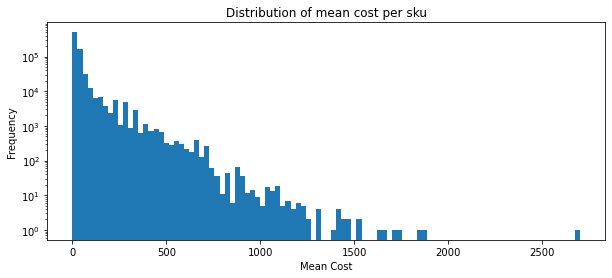

In [22]:
# Mean cost distribution 
ax = df_sku[('COST', 'mean')].plot.hist(bins = 100, log = True,
                                       figsize = (10,4))

# Customize axis 
plt.xlabel("Mean Cost")
plt.title("Distribution of mean cost per sku")

In [23]:
# Statistics for mean cost
df_sku[('COST', 'mean')].agg([np.mean,'median','std','max','min','skew', 'kurtosis']).transpose()

mean          35.253168
median        18.679437
std           64.433440
max         2700.000000
min            0.000000
skew           6.211542
kurtosis      58.274973
Name: (COST, mean), dtype: float64

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of log mean cost per sku')

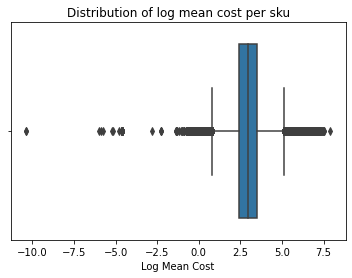

In [24]:
# Box plot 
ax = sns.boxplot(x = np.log(df_sku[('COST', 'mean')]))
plt.xlabel("Log Mean Cost")
plt.title("Distribution of log mean cost per sku")

From the above histogram, we can see that there is one SKU whose price is much more higher than the others. Additionally, from the summary statistics and box plot, we see that there are many other outliers in the sample and that the is skewed. This items might correspond to luxury products or electronics in the store. Lets find out which item have the highest mean cost, even though without an SKU dictionary it is impossible to know which are products.

In [25]:
# Get 20 most expensive items
df_sku[('COST', 'mean')].sort_values(ascending = False).head(20)

SKU
6200173    2700.00
1811281    1872.54
3678048    1854.96
4338048    1747.20
860149     1710.96
5168032    1651.20
159502     1638.24
5240674    1536.72
5480674    1536.72
920147     1464.00
1220149    1462.56
9779838    1450.00
9849838    1450.00
1099502    1420.56
969502     1420.56
9700146    1405.92
120147     1405.92
3728048    1391.22
5589975    1318.80
4348048    1310.40
Name: (COST, mean), dtype: float64

#### Retail price

Text(0.5, 1.0, 'Distribution of mean retail price per sku')

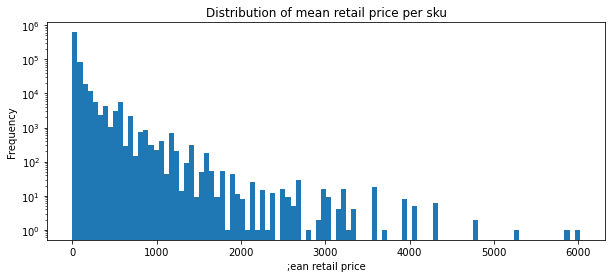

In [26]:
# Mean retail price distribution 
ax = df_sku[('RETAIL', 'mean')].plot.hist(bins = 100, log = True,
                                       figsize = (10,4))

# Customize axis 
plt.xlabel(";ean retail price")
plt.title("Distribution of mean retail price per sku")

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


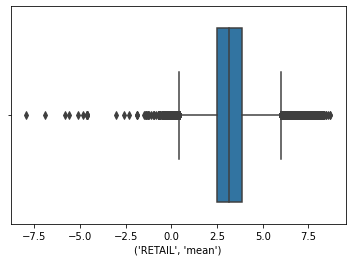

In [27]:
# Box plot 
ax = sns.boxplot(x = np.log(df_sku[('RETAIL', 'mean')]))

In [28]:
# Statistics for mean retail price
df_sku[('RETAIL', 'mean')].agg([np.mean,'median','std','max','min','skew', 'kurtosis']).transpose()

mean          55.272804
median        23.333333
std          127.715931
max         6017.000000
min            0.000000
skew           8.791540
kurtosis     141.580510
Name: (RETAIL, mean), dtype: float64

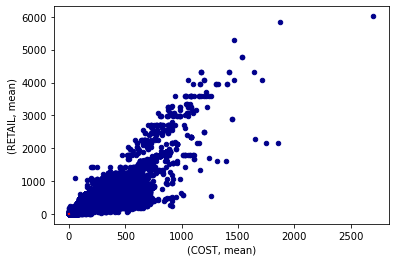

In [34]:
ax = df_sku.plot.scatter(x=('COST', 'mean'),
                      y=('RETAIL', 'mean'),
                      c='DarkBlue')

#### Profit

From the above histogram, we can see that there are 4 SKU whose retail price is much more higher than the others. Additionally, from the summary statistics and box plot, we see that there are many other outliers in the sample and that the distribution is skewed. This items might also correspond to luxury products or electronics in the store. However, given that the histogram for retail price has a heavier right tail, we can assume that many products have an inflated retail price. 

Lastly, lets calculate the profit for every SKU. 

Text(0.5, 1.0, 'Distribution of mean profit per sku')

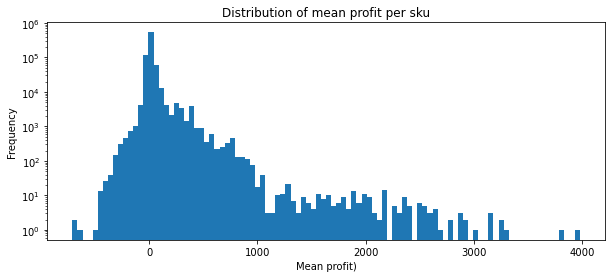

In [29]:
df_sku['Profit'] = df_sku[('RETAIL', 'mean')]-df_sku[('COST', 'mean')]
# Mean retail price distribution 
ax = df_sku['Profit'].plot.hist(bins = 100, log = True,
                                       figsize = (10,4))
# Customize axis 
plt.xlabel("Mean profit)")
plt.title("Distribution of mean profit per sku")

/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/alelli/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


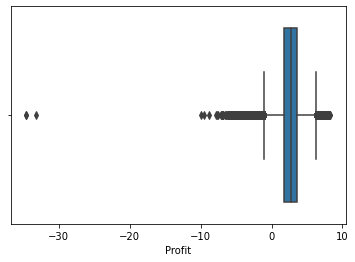

In [30]:
# Box plot 
ax = sns.boxplot(x = np.log(df_sku['Profit']))

In [31]:
# Statistics for mean profit
df_sku[('Profit')].agg([np.mean,'median','std','max','min','skew', 'kurtosis']).transpose()

mean          20.019637
median         4.294452
std           77.545588
max         3977.460000
min         -710.320000
skew           9.704653
kurtosis     198.638493
Name: Profit, dtype: float64

From the above histogram, we can see that there SKU's for which the profit is huge, but also some for which the profit is negative; this is, the retail price was less than the cost and represent a loss for the company. This negative profits might be associated to those sku's with a zero retail price that we assume were donations/promotions. 

Additionally, from the summary statistics and box plot, we see that there are many other outliers in the sample and that the distribution is skewed. The mean revenue per sku is 20 dollars and 50 percent of the skus have a revenue of 4 dollars. 